In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import string
from nltk.corpus import stopwords
stopWords = set(stopwords.words("english"))
stopWords.add("im")

In [3]:
train = pd.read_csv("../data/train.csv")

In [4]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [1]:
class Raven(object):
    
    self.vocabulary = {}
    self.class_categories = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
    
    self.data = None
    
    def __init__(self, corpus, class_name):
        self.data = corpus    # data frame with comment_text and class labels
        
    def build_vocab(self):
        
        
    def return_top_n(class_name, n):
        
    

IndentationError: expected an indented block (<ipython-input-1-fbc47fe7f9f8>, line 9)

In [39]:
sev_toxic = train[train["severe_toxic"] == 1]

text_block = toxic["comment_text"].values[0:10]

for item in text_block:
    print(item, "\n\n")

COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK 


Stupid peace of shit stop deleting my stuff asshole go die and fall in a hole go to hell! 


you are a stupid fuck 

and your mother's cunt stinks 


Hi 

Im a fucking bitch.

50.180.208.181 


What a motherfucking piece of crap those fuckheads for blocking us! 


"You know, I was thinking...

Nobody really attacked me before I revealed my age here.  After I announced that I was 14, I was subject to a constant storm of harassment and abuse.

The same thing goes for when I was on The Sandbox when I was 11.  Before people knew my age, they didn't care.  After I told them my age, they hated me.

It's just so amusing how the idiot Soapboxers think of teenagers as being responsible for the ""decline"" of The Soapbox (like it was ever any good to begin with).  This is funny, because the adults are the dumbest people here.  Mauricio, Chuppah, Redneckgirl, Pinky, Scooby, GG, ForeverLostTinkerbell, greenrabbit, StarRocketsInFlight, Bree-Robinson, 

In [109]:
punct = set(string.punctuation)
print(string.punctuation)

def loudness(line):
    '''
    unstripped line
    '''
    uppers = set(string.ascii_uppercase)
    all_chars = set(string.ascii_letters)
    
    upper_count = 0
    all_count = 0
    for ch in line:
        if ch in all_chars:
            all_count += 1
            
            if ch in uppers:
                upper_count += 1
    
#     print("loudness: {:0.4f}".format(upper_count / (all_count * 1.0)))
    return upper_count / (all_count * 1.0)  # make compatible with python 2.7 if others use

def repeating(line):
    '''
    stripped line prob works best
    '''
    
    temp = line.split()
    
    return 1.0 - (len(set(temp)) / (len(temp) * 1.0 ))

def build_vocab(line, v_dict, swords):
    '''
    parse the current line and add to v_dict counts
    '''
    
    word_list = line.split()
    
    # figure out how repetitious a line is so if it repeats a lot only add the first 10 words
    # so that one comment with something repeated 500 times doesn't blow out the vocab count
    if repeating(line) > 0.95:
        word_list = word_list[:10]
    
    # for each word in the line
    for word in word_list:
        
        # skip stop words for frequency count type stuff
        if word not in swords and len(word) > 1:

            # see if the word is in the vocab, if so increment
            if word in v_dict:
                v_dict[word] += 1

            # otherwise add word to dict with count of 1
            else:
                v_dict[word] = 1
        

def strip_line(line):
    line = line.replace(",", " ").replace("\n", " ")
    line = line.replace("..", " ").replace("??", " ").replace("!!", " ")
    line = line.replace(". ", " EOS ").replace("? ", " EOS ").replace("! ", " EOS ")
    line = "".join([_c if _c not in punct else " " for _c in line])
    
    word_list = line.lower().split()
    
    # if a sentence doesn't have eos add it?
    # might want to remove this when evaluating, not having terminating punctuation
    # is probably signal
    if word_list[-1] != "eos":
        word_list.append("eos")
        
    line = " ".join(word_list)
#     print(line)
    
#     if "yourselfgo" in line:
#         print("#########", line)
    
    return line

for line in text_block:
    print (strip_line(line), "\n\n\n")

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
cocksucker before you piss around on my work eos 



stupid peace of shit stop deleting my stuff asshole go die and fall in a hole go to hell eos 



you are a stupid fuck and your mother s cunt stinks eos 



hi im a fucking bitch eos 50 180 208 181 eos 



what a motherfucking piece of crap those fuckheads for blocking us eos 



you know i was thinking eos nobody really attacked me before i revealed my age here eos after i announced that i was 14 i was subject to a constant storm of harassment and abuse eos the same thing goes for when i was on the sandbox when i was 11 eos before people knew my age they didn t care eos after i told them my age they hated me eos it s just so amusing how the idiot soapboxers think of teenagers as being responsible for the decline of the soapbox like it was ever any good to begin with eos this is funny because the adults are the dumbest people here eos mauricio chuppah redneckgirl pinky scooby gg foreverlosttinkerbell 

In [110]:
vocab_count = {}

sev_toxic_stripped = sev_toxic["comment_text"].apply(strip_line)
loudness = sev_toxic["comment_text"].apply(loudness)

_ = sev_toxic_stripped.apply(lambda line: build_vocab(line, vocab_count, stopWords))

repeater = sev_toxic_stripped.apply(repeating)
sev_toxic_stripped.head()

6       cocksucker before you piss around on my work eos
55     stupid peace of shit stop deleting my stuff as...
181    you are a stupid fuck and your mother s cunt s...
442         hi im a fucking bitch eos 50 180 208 181 eos
579    what a motherfucking piece of crap those fuckh...
Name: comment_text, dtype: object

In [111]:
bad_stuff = sev_toxic_stripped[sev_toxic_stripped.apply(lambda line: "fuckyourself" in line)]

print(bad_stuff)

50797    smyou have a message re your last change go fu...
Name: comment_text, dtype: object


In [112]:
vocab_count_df = pd.DataFrame(list(vocab_count.items()), columns=["word", "count"])

vocab_count_df = vocab_count_df.sort_values("count", ascending=False)

vocab_count_df = vocab_count_df[vocab_count_df.loc[:, "word"] != "eos"]
# vocab_count_df.drop([0], inplace=True)
vocab_count_df.head(25)

,word,count
17,fuck,1119
22,fucking,627
23,bitch,466
7,shit,333
12,go,293
218,ass,267
190,suck,255
487,wikipedia,249
164,get,201
11,asshole,195


In [49]:
repeater.head()

6      0.000000
55     0.050000
181    0.000000
442    0.090909
579    0.000000
Name: comment_text, dtype: float64

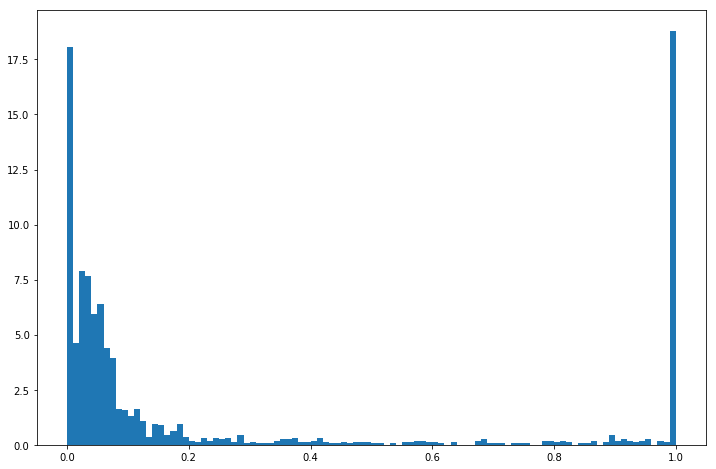

In [57]:
fig, ax = plt.subplots(figsize=(12, 8))

_ = ax.hist(loudness, bins=100, normed=True)